# 한글 설치
- 한번 실행하고 런타임 다시 시작해서 다시 실행해야 적용됨.

In [1]:
import matplotlib.pyplot as plt

In [2]:
#한글 폰트 살리기 위함 -> 타이틀에만 반영되더라 ㅠ
from matplotlib import rc
from matplotlib import font_manager as fm

In [3]:
from matplotlib import rcParams
import matplotlib as mpl

In [4]:
#nanum 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/u

In [7]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [8]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
#여기가 폰트 사이즈를 정하는 곳.
font_name = fm.FontProperties(fname=path, size=16).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [9]:
fm._rebuild()

In [10]:
!pip install statsmodels

In [11]:
!pip install pmdarima

In [12]:
!pip install tqdm

In [13]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import re
import math
from sklearn.metrics import r2_score

In [14]:
from pmdarima.arima import auto_arima

In [15]:
import datetime
from dateutil.relativedelta import relativedelta

import statsmodels
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

In [17]:
from tqdm.notebook import tqdm

In [18]:
loc_inf=pd.read_csv('/content/drive/My Drive/data/whole.csv',index_col=0)

In [19]:
loc_inf=loc_inf[['날짜','시구분', '구구분', '에볼라바이러스병', '마버그열', '라싸열', '크리미안콩고출혈열', '남아메리카출혈열',
       '리프트밸리열', '두창', '페스트', '탄저', '보툴리눔독소증', '야토병', '신종감염병증후군',
       '중증급성호흡기증후군(SARS)', '중동호흡기증후군(MERS)', '동물인플루엔자 인체감염증', '신종인플루엔자',
       '디프테리아', '수두', '홍역', '콜레라', '장티푸스', '파라티푸스', '세균성이질', '장출혈성대장균감염증',
       'A형간염', '백일해', '유행성이하선염', '풍진(2018년이전)', '풍진(선천성)', '풍진(후천성)', '폴리오',
       '수막구균 감염증', 'b형헤모필루스인플루엔자', '폐렴구균 감염증', '한센병', '성홍열',
       '반코마이신내성황색포도알균(VRSA) 감염증', '카바페넴내성장내세균속균종(CRE) 감염증', 'E형간염', '파상풍',
       'B형간염', '일본뇌염', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '발진티푸스', '발진열',
       '쯔쯔가무시증', '렙토스피라증', '브루셀라증', '공수병', '신증후군출혈열',
       '크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD)', '황열', '뎅기열', '큐열', '웨스트나일열',
       '라임병', '진드기매개뇌염', '유비저', '치쿤구니야열', '중증열성혈소판감소증후군(SFTS)', '지카바이러스감염증']]

In [20]:
loc_inf

,날짜,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증
0,201001,전국,전국,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1138,0,0,14,5,14,0,0,3,256,3,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,1,3,0,0,1,23,1,2,0,16,0,0,9,5,0,0,0,0,0,0,0
1,201001,서울,서울,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,112,0,0,1,2,2,0,0,0,31,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
2,201001,서울,강남구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,201001,서울,강동구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,201001,서울,강북구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,202007,제주,제주시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,0,0,1,0,1,2,0,20,0,0,0,0,0,0,0,0,5,0,19,0,0,0,0,11,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
286,202007,제주,남제주군,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
287,202007,제주,북제주군,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
288,202007,세종,세종,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
nowon_su=loc_inf[(loc_inf['시구분']=='서울')&(loc_inf['구구분']=='노원구')]

In [22]:
nowon_su

,날짜,시구분,구구분,에볼라바이러스병,마버그열,라싸열,크리미안콩고출혈열,남아메리카출혈열,리프트밸리열,두창,페스트,탄저,보툴리눔독소증,야토병,신종감염병증후군,중증급성호흡기증후군(SARS),중동호흡기증후군(MERS),동물인플루엔자 인체감염증,신종인플루엔자,디프테리아,수두,홍역,콜레라,장티푸스,파라티푸스,세균성이질,장출혈성대장균감염증,A형간염,백일해,유행성이하선염,풍진(2018년이전),풍진(선천성),풍진(후천성),폴리오,수막구균 감염증,b형헤모필루스인플루엔자,폐렴구균 감염증,한센병,성홍열,반코마이신내성황색포도알균(VRSA) 감염증,카바페넴내성장내세균속균종(CRE) 감염증,E형간염,파상풍,B형간염,일본뇌염,C형간염,말라리아,레지오넬라증,비브리오패혈증,발진티푸스,발진열,쯔쯔가무시증,렙토스피라증,브루셀라증,공수병,신증후군출혈열,크로이츠펠트-야콥병(CJD) 및 변종크로이츠펠트-야콥병(vCJD),황열,뎅기열,큐열,웨스트나일열,라임병,진드기매개뇌염,유비저,치쿤구니야열,중증열성혈소판감소증후군(SFTS),지카바이러스감염증
10,201001,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,201002,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,201003,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,201004,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,201005,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,202003,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,3,0,5,0,0,0,0,0,0,0,0,4,0,7,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,202004,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,1,0,0,1,0,8,0,0,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,202005,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,2,0,8,0,0,0,0,0,0,0,0,1,0,3,0,0,1,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,202006,서울,노원구,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,1,3,0,12,0,0,0,0,0,0,0,0,2,0,9,0,0,0,0,5,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
mod = sm.tsa.SARIMAX(nowon_su['유행성이하선염'],order=(1,0,0), seasonal_order=(3,1,0,12))
results = mod.fit()
print (results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            유행성이하선염   No. Observations:                  127
Model:             SARIMAX(1, 0, 0)x(3, 1, 0, 12)   Log Likelihood                -391.246
Date:                            Mon, 28 Sep 2020   AIC                            792.492
Time:                                    01:59:20   BIC                            806.217
Sample:                                         0   HQIC                           798.063
                                            - 127                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5471      0.066      8.298      0.000       0.418       0.676
ar.S.L12      -0.5674      0.044   

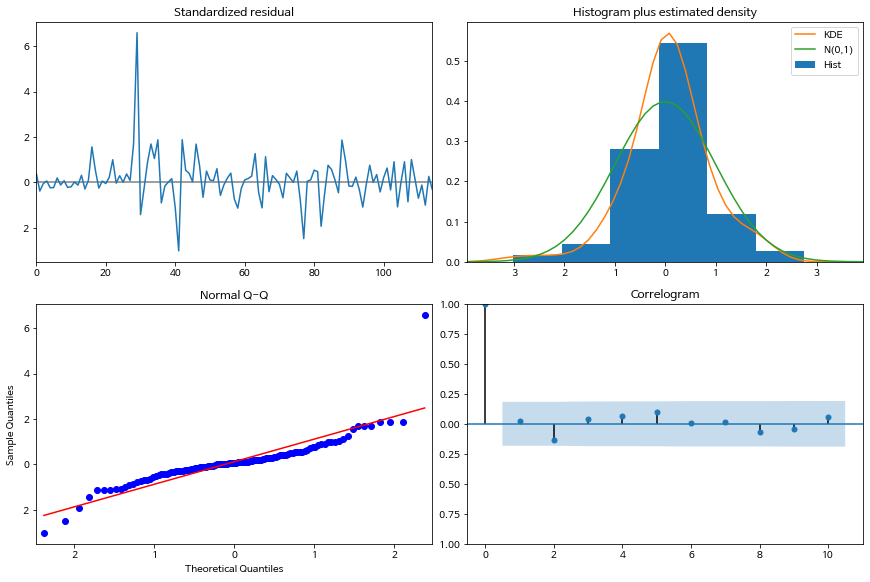

In [24]:
results.plot_diagnostics(figsize=(12,8))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [25]:
nowon_mid=nowon_su[['시구분','구구분','날짜','유행성이하선염']]

In [26]:
nowon_mid

,시구분,구구분,날짜,유행성이하선염
10,서울,노원구,201001,0
10,서울,노원구,201002,1
10,서울,노원구,201003,2
10,서울,노원구,201004,2
10,서울,노원구,201005,2
...,...,...,...,...
10,서울,노원구,202003,5
10,서울,노원구,202004,8
10,서울,노원구,202005,8
10,서울,노원구,202006,12


In [27]:
nowon_mid[((nowon_mid['날짜']%100==7)|(nowon_mid['날짜']%100==6)|(nowon_mid['날짜']%100==8))&(nowon_mid['날짜']//100>2014)].reset_index(drop=True)

,시구분,구구분,날짜,유행성이하선염
0,서울,노원구,201506,10
1,서울,노원구,201507,7
2,서울,노원구,201508,6
3,서울,노원구,201606,7
4,서울,노원구,201607,12
5,서울,노원구,201608,5
6,서울,노원구,201706,11
7,서울,노원구,201707,6
8,서울,노원구,201708,3
9,서울,노원구,201806,22


In [28]:
np.median(nowon_mid[((nowon_mid['날짜']%100==7)|(nowon_mid['날짜']%100==6)|(nowon_mid['날짜']%100==8))&(nowon_mid['날짜']//100>2014)]['유행성이하선염'])

10.0

In [29]:
class pre_caution():

  def __init__(self,loc_inf):
    self.loc_inf=loc_inf
    self.virus_list=loc_inf.columns[3:].tolist()
    self.si_list=loc_inf['시구분'].unique().tolist()
    self.residence_si=personal.residence_si[0]
    self.residence_gu=personal.residence_gu[0]
    self.age=personal.age[0]
  
  def virus_pd(self,loc_si,loc_gu,virus):
    loc_virus=self.loc_inf[['구구분','날짜',virus]][(self.loc_inf['구구분']==loc_gu)&(self.loc_inf['시구분']==loc_si)].reset_index(drop=True)
    loc_virus[virus] = loc_virus[virus].apply(lambda x : float(x))
    return loc_virus
  
  def preprocessing_pd(self,raw_data,virus):
    prepro_pd=raw_data[['날짜',virus]]
    prepro_pd['년']=prepro_pd['날짜'].apply(lambda x : x//100)
    prepro_pd['월']=prepro_pd['날짜'].apply(lambda x : x%100)
    prepro_pd=prepro_pd.reset_index(drop=True)
    prepro_pd['과거 5년 중앙값']=0
    prepro_pd['중앙값 초과 여부']=0
    prepro_pd['전처리 후 발생건수']=prepro_pd[virus]
    for i in prepro_pd.index:
      try:
        virus_5=[]
        date_5=[]
        for r in range(5,0,-1):
          for m in range(1,-2,-1):
            if prepro_pd.iloc[i]['월']==12:
              if m != -1:
                virus_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r))&(prepro_pd['월']==(prepro_pd.iloc[i]['월']-m))][virus].values[0])
              else:
                virus_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r+1))&(prepro_pd['월']==1)][virus].values[0])
            elif prepro_pd.iloc[i]['월']==1:
              if m != 1:
                virus_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r))&(prepro_pd['월']==(prepro_pd.iloc[i]['월']-m))][virus].values[0])
              else:
                virus_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r-1))&(prepro_pd['월']==12)][virus].values[0])
            else:
              virus_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r))&(prepro_pd['월']==(prepro_pd.iloc[i]['월']-m))][virus].values[0])
        prepro_pd['과거 5년 중앙값'][i]=np.median(virus_5)
        if (prepro_pd[virus][i]>np.median(virus_5))&(np.median(virus_5)!=0):
          prepro_pd['중앙값 초과 여부'][i]=1
          prepro_pd['전처리 후 발생건수'][i]=new_lin.predict(prepro_pd['날짜'][i])
      except:
        pass
    for i in prepro_pd.index:
      if prepro_pd['중앙값 초과 여부'][i]==1:
        try:
          month_5=[]
          month_date5=[]
          for r in range(5,0,-1):
              month_5.append(prepro_pd[(prepro_pd['년']==(prepro_pd.iloc[i]['년']-r))&(prepro_pd['월']==prepro_pd['월'][i])]['전처리 후 발생건수'].values[0])
              month_date5.append((prepro_pd.iloc[i]['년']-r)*100+(prepro_pd.iloc[i]['월']))
          new_lin = sm.OLS(month_5,month_date5).fit()
          if new_lin.predict(prepro_pd['날짜'][i])<prepro_pd[virus][i]:
            prepro_pd['전처리 후 발생건수'][i]=new_lin.predict(prepro_pd['날짜'][i])
          else:
            prepro_pd['전처리 후 발생건수'][i]=prepro_pd['과거 5년 중앙값'][i]
        except:
          pass
    return prepro_pd

  def arima_predict(self,data,virus,scope):
    y_forec_list=[]
    conf_list=[]
    ari_data=self.preprocessing_pd(data[['날짜',virus]],virus)
    print(ari_data)
    if scope=='all':
      for i in ari_data.index:
        try:
          train=ari_data.iloc[i-60:i][['날짜','전처리 후 발생건수']]
          train['날짜']= train['날짜'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:])
          train.index=pd.to_datetime(train['날짜'])
          train=train[['전처리 후 발생건수']]
          arima_model=auto_arima(train, start_p=0, d=0, start_q=0,
                            max_p=3, max_d=3, max_q=3, start_P=0, D=1,
                            start_Q=0, max_P=3, max_D=1,
                            max_Q=3,m=12,seasonal=True,
                            error_action='warn',trace=False,
                            supress_warnings=True, stepwise=True,
                            random_state=20, n_fits=50)
          y_forec, conf_int = arima_model.predict(n_periods=1,return_conf_int=True,alpha=0.05)
          y_forec_list.append([y_forec[0],ari_data.iloc[i]['날짜']])
          conf_list.append([conf_int[0][0],conf_int[0][1],ari_data.iloc[i]['날짜']])
          if i == ari_data.index[-1]:
            print(arima_model.summary())
        except:
          pass
    elif scope == 'recent':
        i=ari_data.index[-1]
        train=ari_data.iloc[i-60:i][['날짜','전처리 후 발생건수']]
        train['날짜']= train['날짜'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:])
        train.index=pd.to_datetime(train['날짜'])
        train=train[['전처리 후 발생건수']]
        arima_model=auto_arima(train, start_p=0, d=0, start_q=0,
                          max_p=3, max_d=3, max_q=3, start_P=0, D=1,
                          start_Q=0, max_P=3, max_D=1,
                          max_Q=3,m=12,seasonal=True,
                          error_action='warn',trace=False,
                          supress_warnings=True, stepwise=True,
                          random_state=20, n_fits=50)
        y_forec, conf_int = arima_model.predict(n_periods=1,return_conf_int=True,alpha=0.05)
        y_forec_list.append([y_forec[0],ari_data.iloc[i]['날짜']])
        conf_list.append([conf_int[0][0],conf_int[0][1],ari_data.iloc[i]['날짜']])
    prediction=pd.DataFrame(y_forec_list,columns=['predict_virus','날짜'])
    conf_lv=pd.DataFrame(conf_list,columns=['Confidence Lower','Confidence Upper','날짜'])
    conf_lv['날짜']= conf_lv['날짜'].apply(lambda x : str(int(x))[:4]+'-'+str(int(x))[4:])
    prediction['날짜']= prediction['날짜'].apply(lambda x : str(int(x))[:4]+'-'+str(int(x))[4:])
    conf_lv.index=pd.to_datetime(conf_lv['날짜'])
    prediction.index=pd.to_datetime(prediction['날짜'])
    conf_lv=conf_lv[['Confidence Lower','Confidence Upper']]
    prediction=prediction[['predict_virus']]
    return prediction, conf_lv
  
  def regression_predict(self,data,virus,scope):
    reg_pd=self.preprocessing_pd(data[['날짜',virus]],virus)
    reg_pd['c1']=np.cos(2*math.pi*reg_pd.index/12)
    reg_pd['d1']=np.sin(2*math.pi*reg_pd.index/12)
    reg_pd['c2']=np.cos(4*math.pi*reg_pd.index/12)
    reg_pd['d2']=np.sin(4*math.pi*reg_pd.index/12)
    reg_pd_train=sm.add_constant(reg_pd.reset_index()[['index','c1','d1','c2','d2']])
    reg_pd['predict_virus']=0
    reg_pd['obs_ci_lower']=0
    reg_pd['obs_ci_upper']=0
    if scope=='all':
      for i in reg_pd.index:
        try:
          pre_lin = sm.OLS(reg_pd[i-60:i]['전처리 후 발생건수'],reg_pd_train[i-60:i]).fit()
          pre_pd=pre_lin.get_prediction(reg_pd_train.iloc[i:i+1,:]).summary_frame(alpha = 0.05)
          reg_pd['predict_virus'][i]=pre_pd['mean'].values[0]
          reg_pd['obs_ci_lower'][i]=pre_pd['obs_ci_lower'].values[0]
          reg_pd['obs_ci_upper'][i]=pre_pd['obs_ci_upper'].values[0]
          if i == reg_pd.index[-1]:
            print(pre_lin.summary())
        except:
          pass
    elif scope=='recent':
      i=reg_pd.index[-1]
      pre_lin = sm.OLS(reg_pd[i-60:i]['전처리 후 발생건수'],reg_pd_train[i-60:i]).fit()
      pre_pd=pre_lin.get_prediction(reg_pd_train.iloc[i:i+1,:]).summary_frame(alpha = 0.05)
      reg_pd['predict_virus'][i]=pre_pd['mean'].values[0]
      reg_pd['obs_ci_lower'][i]=pre_pd['obs_ci_lower'].values[0]
      reg_pd['obs_ci_upper'][i]=pre_pd['obs_ci_upper'].values[0]
    reg_pd['날짜']=reg_pd['날짜'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:])
    reg_pd.index=pd.to_datetime(reg_pd['날짜'])
    return reg_pd
  
  def personal_caution(self):
    for virus in self.virus_list:
      personal_virus=self.virus_pd(self.residence_si,self.residence_gu,virus)
      print('{}_{}_{}'.format(self.residence_gu,virus,personal_virus[virus].iloc[-1]))
      if personal_virus[virus].iloc[-1]>1:
        arima_pred, arima_conf=self.arima_predict(personal_virus,virus,'all')
        reg_pred=self.regression_predict(personal_virus,virus,'all')
        personal_virus['날짜']=personal_virus['날짜'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:])
        personal_virus.index=pd.to_datetime(personal_virus['날짜'])
        print(personal_virus)
        print('-------------------')
        print(arima_pred)
        print('-------------------')
        print(arima_conf)
        print('-------------------')
        print(reg_pred)
        print('===================')
        plt.figure(figsize=(14,6))
        plt.plot(personal_virus.index,personal_virus[[virus]],linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",linewidth=3)
        plt.plot(arima_conf.index,arima_pred, color = "red")
        plt.plot(arima_conf.index,arima_conf['Confidence Upper'], color = "blue", linestyle = "--")
        plt.plot(arima_conf.index,arima_conf['Confidence Lower'], color = "blue", linestyle = "--")
        plt.legend(['발생건수','arima_predict','arima_conf_upper','arima_conf_lower'],prop={'size':10})
        if self.residence_si=='전국':
          plt.title('{}_{} arima_time_series'.format(self.residence_si,virus),fontsize=20)
        else:  
          plt.title('{} {}_{} arima_time_series'.format(self.residence_si,self.residence_gu,virus),fontsize=20)
        plt.show()
        if arima_conf['Confidence Upper'].iloc[-1]<personal_virus[virus].iloc[-1]:
          print('{} {}_{} 유행'.format(self.residence_si,self.residence_gu,virus))
        plt.figure(figsize=(14, 6))
        plt.plot(reg_pred.index, reg_pred[virus], linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",linewidth=3)
        plt.plot(reg_pred.index, reg_pred['predict_virus'], color = "red")
        plt.plot(reg_pred.index, reg_pred['obs_ci_upper'], color = "blue", linestyle = "--")
        plt.plot(reg_pred.index, reg_pred['obs_ci_lower'], color = "blue", linestyle = "--")
        plt.legend(['발생건수','reg_predict','reg_conf_upper','reg_conf_lower'],prop={'size':10})
        if self.residence_si=='전국':
          plt.title('{}_{} reg_time_series'.format(self.residence_si,virus),fontsize=20)
        else:
          plt.title('{} {}_{} reg_time_series'.format(self.residence_si,self.residence_gu,virus),fontsize=20)
        plt.show()
        if reg_pred['obs_ci_upper'].iloc[-1]<personal_virus[virus].iloc[-1]:
          print('{} {}_{} 유행'.format(self.residence_si,self.residence_gu,virus))

  def destination_caution(self,destination_si,destination_gu):
    for virus in self.virus_list:
      destination_virus=self.virus_pd(destination_si,destination_gu,virus)
      print('{}_{}_{}'.format(destination_gu,virus,destination_virus[virus].iloc[-1]))
      if destination_virus[virus].iloc[-1]>1:
        arima_pred, arima_conf=self.arima_predict(destination_virus,virus,'all')
        reg_pred=self.regression_predict(destination_virus,virus,'all')
        destination_virus['날짜']=destination_virus['날짜'].apply(lambda x : str(x)[:4]+'-'+str(x)[4:])
        destination_virus.index=pd.to_datetime(destination_virus['날짜'])
        print(destination_virus)
        print('-------------------')
        print(arima_pred)
        print('-------------------')
        print(arima_conf)
        print('-------------------')
        print(reg_pred)
        print('===================')
        plt.figure(figsize=(14,6))
        plt.plot(destination_virus.index,destination_virus[[virus]],linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",linewidth=3)
        plt.plot(arima_conf.index,arima_pred, color = "red")
        plt.plot(arima_conf.index,arima_conf['Confidence Upper'], color = "blue", linestyle = "--")
        plt.plot(arima_conf.index,arima_conf['Confidence Lower'], color = "blue", linestyle = "--")
        plt.legend(['발생건수','arima_predict','arima_conf_upper','arima_conf_lower'],prop={'size':10})
        if destination_si=='전국':
          plt.title('{}_{} arima_time_series'.format(destination_si,virus),fontsize=20)
        else:
          plt.title('{} {}_{} arima_time_series'.format(destination_si,destination_gu,virus),fontsize=20)
        plt.show()
        if arima_conf['Confidence Upper'].iloc[-1]<destination_virus[virus].iloc[-1]:
          print('{} {}_{} 유행'.format(destination_si,destination_gu,virus))
        plt.figure(figsize=(14, 6))
        plt.plot(reg_pred.index, reg_pred[virus], linestyle = "None", marker = "o",markerfacecolor = "None", color = "black",linewidth=3)
        plt.plot(reg_pred.index, reg_pred['predict_virus'], color = "red")
        plt.plot(reg_pred.index, reg_pred['obs_ci_upper'], color = "blue", linestyle = "--")
        plt.plot(reg_pred.index, reg_pred['obs_ci_lower'], color = "blue", linestyle = "--")
        plt.legend(['발생건수','reg_predict','reg_conf_upper','reg_conf_lower'],prop={'size':10})
        if destination_si=='전국':
          plt.title('{}_{} reg_time_series'.format(destination_si, virus),fontsize=20)
        else: 
          plt.title('{} {}_{} reg_time_series'.format(destination_si,destination_gu, virus),fontsize=20)
        plt.show()
        if reg_pred['obs_ci_upper'].iloc[-1]<destination_virus[virus].iloc[-1]:
          print('{} {}_{} 유행'.format(destination_si,destination_gu,virus))

  def epidemic_now(self):
    epidemic_list=[]
    for virus_si in tqdm(self.si_list):
      for virus_gu in tqdm(self.loc_inf[self.loc_inf['시구분']==virus_si]['구구분'].unique()):
        for virus in self.virus_list:
          try:
            virus_sigu=self.virus_pd(virus_si,virus_gu,virus)
            if virus_sigu[virus].iloc[-1]>1:
              arima_pred, arima_conf=self.arima_predict(virus_sigu,virus,'recent')
              reg_pred=self.regression_predict(virus_sigu,virus,'recent')
              if (arima_conf['Confidence Upper'].iloc[-1]<virus_sigu[virus].iloc[-1])|(reg_pred['obs_ci_upper'].iloc[-1]<virus_sigu[virus].iloc[-1]):
                epidemic_list.append([virus_si,virus_gu,virus_sigu['날짜'].iloc[-1],virus,virus_sigu[virus].iloc[-1],
                                      arima_pred['predict_virus'].iloc[-1],arima_conf['Confidence Upper'].iloc[-1],
                                      reg_pred['predict_virus'].iloc[-1],reg_pred['obs_ci_upper'].iloc[-1],1])
              else:
                epidemic_list.append([virus_si,virus_gu,virus_sigu['날짜'].iloc[-1],virus,virus_sigu[virus].iloc[-1],
                                      arima_pred['predict_virus'].iloc[-1],arima_conf['Confidence Upper'].iloc[-1],
                                      reg_pred['predict_virus'].iloc[-1],reg_pred['obs_ci_upper'].iloc[-1],0])
            else:
              epidemic_list.append([virus_si,virus_gu,virus_sigu['날짜'].iloc[-1],virus,virus_sigu[virus].iloc[-1],
                                    0,0,0,0,0]) 
          except:
            pass
    epidemic_pd=pd.DataFrame(epidemic_list,columns=['시구분','구구분','날짜','감염병명','발생건수','ARIMA_pred','ARIMA_95','REG_pred','REG_95','유행여부'])
    return epidemic_pd

In [30]:
personal=pd.DataFrame([['서울','노원구',20]],columns=['residence_si','residence_gu','age'])

In [31]:
test_caution=pre_caution(loc_inf)

In [ ]:
epi_all=test_caution.epidemic_now()

In [ ]:
epi_all.to_csv('/content/drive/My Drive/BigCon_BiKong/최종자료/epidemic_now_final.csv')

In [32]:
epi_all=pd.read_csv('//content/drive/My Drive/BigCon_BiKong/최종자료/csv 및 활용 데이터/epidemic_now.csv',index_col=0)

In [33]:
epi_all

,시구분,구구분,날짜,감염병명,발생건수,ARIMA_pred,ARIMA_95,REG_pred,REG_95,유행여부
0,전국,전국,202007,에볼라바이러스병,0.0,0.0,0.0,0,0,0
1,전국,전국,202007,마버그열,0.0,0.0,0.0,0,0,0
2,전국,전국,202007,라싸열,0.0,0.0,0.0,0,0,0
3,전국,전국,202007,크리미안콩고출혈열,0.0,0.0,0.0,0,0,0
4,전국,전국,202007,남아메리카출혈열,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18555,세종,세종시,202007,진드기매개뇌염,0.0,0.0,0.0,0,0,0
18556,세종,세종시,202007,유비저,0.0,0.0,0.0,0,0,0
18557,세종,세종시,202007,치쿤구니야열,0.0,0.0,0.0,0,0,0
18558,세종,세종시,202007,중증열성혈소판감소증후군(SFTS),0.0,0.0,0.0,0,0,0


In [34]:
epi_all[(epi_all['유행여부']==1)&(epi_all['구구분']=='전국')]

,시구분,구구분,날짜,감염병명,발생건수,ARIMA_pred,ARIMA_95,REG_pred,REG_95,유행여부
20,전국,전국,202007,장티푸스,16.0,7.473460,12.976729,8,13,1
21,전국,전국,202007,파라티푸스,33.0,3.686767,6.153822,3,5,1
23,전국,전국,202007,장출혈성대장균감염증,92.0,15.202463,19.102551,13,18,1
24,전국,전국,202007,A형간염,371.0,155.532682,222.004269,173,270,1
37,전국,전국,202007,카바페넴내성장내세균속균종(CRE) 감염증,1632.0,1027.448846,1411.532307,1733,2232,1
38,전국,전국,202007,E형간염,26.0,0.000000,0.000002,0,0,1
39,전국,전국,202007,파상풍,6.0,3.048662,3.956951,2,3,1
40,전국,전국,202007,B형간염,37.0,26.850787,33.552247,17,25,1
44,전국,전국,202007,레지오넬라증,36.0,3.411781,4.200436,3,4,1
45,전국,전국,202007,비브리오패혈증,9.0,3.143927,6.418151,5,9,1


In [35]:
r2_score(epi_all[epi_all['발생건수']!=0]['발생건수'],epi_all[epi_all['발생건수']!=0]['ARIMA_pred'])

0.926295949469186

In [36]:
r2_score(epi_all[epi_all['발생건수']!=0]['발생건수'],epi_all[epi_all['발생건수']!=0]['REG_pred'])

0.879572145830851

노원구_에볼라바이러스병_0.0
노원구_마버그열_0.0
노원구_라싸열_0.0
노원구_크리미안콩고출혈열_0.0
노원구_남아메리카출혈열_0.0
노원구_리프트밸리열_0.0
노원구_두창_0.0
노원구_페스트_0.0
노원구_탄저_0.0
노원구_보툴리눔독소증_0.0
노원구_야토병_0.0
노원구_신종감염병증후군_0.0
노원구_중증급성호흡기증후군(SARS)_0.0
노원구_중동호흡기증후군(MERS)_0.0
노원구_동물인플루엔자 인체감염증_0.0
노원구_신종인플루엔자_0.0
노원구_디프테리아_0.0
노원구_수두_15.0
         날짜    수두     년  월  과거 5년 중앙값  중앙값 초과 여부  전처리 후 발생건수
0    201001   2.0  2010  1          0          0         2.0
1    201002   2.0  2010  2          0          0         2.0
2    201003   4.0  2010  3          0          0         4.0
3    201004   4.0  2010  4          0          0         4.0
4    201005   7.0  2010  5          0          0         7.0
..      ...   ...   ... ..        ...        ...         ...
122  202003  21.0  2020  3         25          0        21.0
123  202004  14.0  2020  4         32          0        14.0
124  202005  14.0  2020  5         32          0        14.0
125  202006  11.0  2020  6         23          0        11.0
126  202007  15.0  2020  7         20         

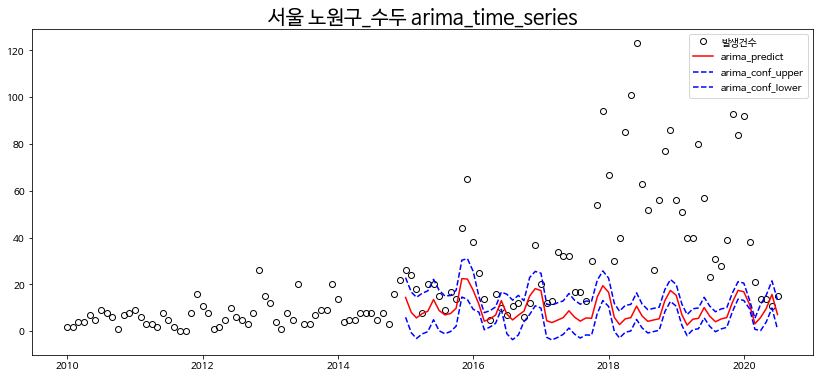

서울 노원구_수두 유행


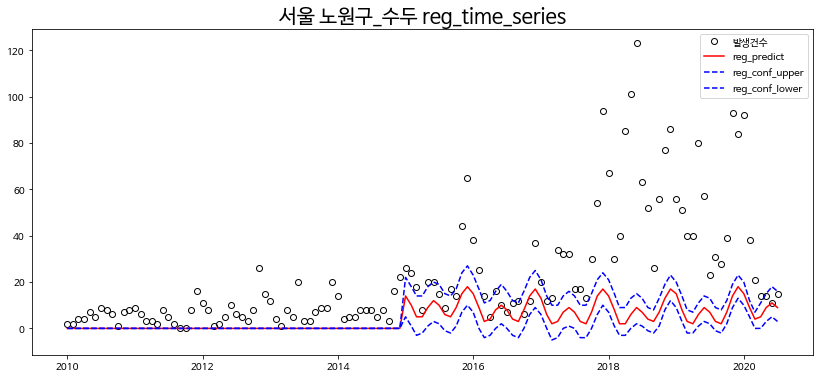

노원구_홍역_0.0
노원구_콜레라_0.0
노원구_장티푸스_0.0
노원구_파라티푸스_0.0
노원구_세균성이질_0.0
노원구_장출혈성대장균감염증_2.0
         날짜  장출혈성대장균감염증     년  월  과거 5년 중앙값  중앙값 초과 여부  전처리 후 발생건수
0    201001         0.0  2010  1          0          0         0.0
1    201002         0.0  2010  2          0          0         0.0
2    201003         0.0  2010  3          0          0         0.0
3    201004         0.0  2010  4          0          0         0.0
4    201005         0.0  2010  5          0          0         0.0
..      ...         ...   ... ..        ...        ...         ...
122  202003         0.0  2020  3          0          0         0.0
123  202004         0.0  2020  4          0          0         0.0
124  202005         0.0  2020  5          0          0         0.0
125  202006         1.0  2020  6          0          0         1.0
126  202007         2.0  2020  7          0          0         2.0

[127 rows x 7 columns]


In [ ]:
test_caution.personal_caution()

In [ ]:
test_caution.destination_caution('전국','전국')

In [ ]:
test_caution.destination_caution('서울','강남구')